In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraud-detection-in-electricity-and-gas-consumption/SampleSubmission.csv
/kaggle/input/fraud-detection-in-electricity-and-gas-consumption/test/invoice_test.csv
/kaggle/input/fraud-detection-in-electricity-and-gas-consumption/test/client_test.csv
/kaggle/input/fraud-detection-in-electricity-and-gas-consumption/train/invoice_train.csv
/kaggle/input/fraud-detection-in-electricity-and-gas-consumption/train/client_train.csv


# Import esential libraries:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read train and test data:

In [4]:
base = '/kaggle/input/fraud-detection-in-electricity-and-gas-consumption/'

# importing train data
client_train = pd.read_csv(base + 'train/client_train.csv')
invoice_train = pd.read_csv(base + 'train/invoice_train.csv', low_memory=False)

# importing test data
client_test = pd.read_csv(base + 'test/client_test.csv')
invoice_test = pd.read_csv(base + 'test/invoice_test.csv')

# importing SampleSubmission dataframe (to understand the objective more clearly)
SampleSubmission = pd.read_csv(base + 'SampleSubmission.csv')

In [5]:
print(f'Submission Sample shape : {SampleSubmission.shape}')
print(f'client_test shape : {client_test.shape}')
print(f'invoice_test shape : {invoice_test.shape}')

Submission Sample shape : (58069, 2)
client_test shape : (58069, 5)
invoice_test shape : (1939730, 16)


* From this we can see that its gonna be a hard problem
* Handling multiple invoices for the same client, especially when the target variable is at the client level rather than the invoice level.

In [6]:
client_train

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0
...,...,...,...,...,...,...
135488,62,train_Client_99995,11,304,26/07/2004,0.0
135489,63,train_Client_99996,11,311,25/10/2012,0.0
135490,63,train_Client_99997,11,311,22/11/2011,0.0
135491,60,train_Client_99998,11,101,22/12/1993,0.0


In [7]:
invoice_train

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476744,train_Client_99998,2005-08-19,10,1253571,0,202,9,1,400,135,0,0,3197,3732,8,ELEC
4476745,train_Client_99998,2005-12-19,10,1253571,0,202,6,1,200,6,0,0,3732,3938,4,ELEC
4476746,train_Client_99999,1996-09-25,11,560948,0,203,6,1,259,0,0,0,13884,14143,4,ELEC
4476747,train_Client_99999,1996-05-28,11,560948,0,203,6,1,603,0,0,0,13281,13884,4,ELEC


# Check test train plit distribution :

In [8]:
print(f'test set is {(client_test.shape[0]/(client_train.shape[0]+client_test.shape[0]))*100:.2f}% of all data')
print(f'client_train sahpe : {client_train.shape}')
print(f'client_test sahpe : {client_test.shape}')

test set is 30.00% of all data
client_train sahpe : (135493, 6)
client_test sahpe : (58069, 5)


# Check target distribution:

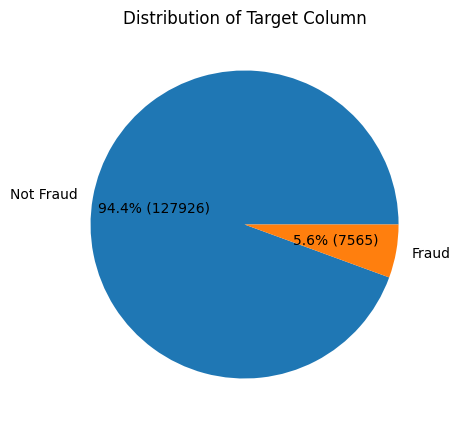

In [9]:
target_counts = client_train['target'].value_counts()
labels = ['Not Fraud','Fraud']
sizes = target_counts.values
total = len(client_train)

# Create a pie plot
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct=lambda p: f'{p:.1f}% ({int(p * total / 100)})')
plt.title('Distribution of Target Column')
plt.show()

* we can see that we have big imbalance dataset
* we will see how to handle this problem later

# EDA:

Lets start by the client data:

In [10]:
client_train

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0
...,...,...,...,...,...,...
135488,62,train_Client_99995,11,304,26/07/2004,0.0
135489,63,train_Client_99996,11,311,25/10/2012,0.0
135490,63,train_Client_99997,11,311,22/11/2011,0.0
135491,60,train_Client_99998,11,101,22/12/1993,0.0


In [11]:
client_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   disrict        135493 non-null  int64  
 1   client_id      135493 non-null  object 
 2   client_catg    135493 non-null  int64  
 3   region         135493 non-null  int64  
 4   creation_date  135493 non-null  object 
 5   target         135493 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 6.2+ MB


msot columns looks fine lets start by the creation_date

In [12]:
# change type to datetime
client_train['creation_date'] = pd.to_datetime(client_train['creation_date'],dayfirst=True)

# Extract date features (day, month, year) i think the year gonna be the only usefull thing maybe month too
client_train['creation_date_day'] = client_train['creation_date'].dt.day
client_train['creation_date_month'] = client_train['creation_date'].dt.month
client_train['creation_date_year'] = client_train['creation_date'].dt.year

# Drop creation_date column
client_train.drop(columns=['creation_date'], inplace=True)


# Same thing for test

# change type to datetime
client_test['creation_date'] = pd.to_datetime(client_test['creation_date'],dayfirst=True)

# Extract date features (day, month, year) i think the year gonna be the only usefull thing maybe month too
client_test['creation_date_day'] = client_test['creation_date'].dt.day
client_test['creation_date_month'] = client_test['creation_date'].dt.month
client_test['creation_date_year'] = client_test['creation_date'].dt.year

# Drop creation_date column
client_test.drop(columns=['creation_date'], inplace=True)

## Plotting client data:

In [13]:
def Reorder(df,column_name):
    '''make the column_name to the last'''
    df=df.copy()  # copy of dataframe
    columns = df.columns.tolist()  # Get a list of column names
    columns.remove(column_name)  # Remove the 'target' column from the list
    columns.append(column_name)  # Append the 'target' column to the end of the list
    df = df[columns]  # Reorder the DataFrame
    return df

In [14]:
client_train=Reorder(client_train,'target')

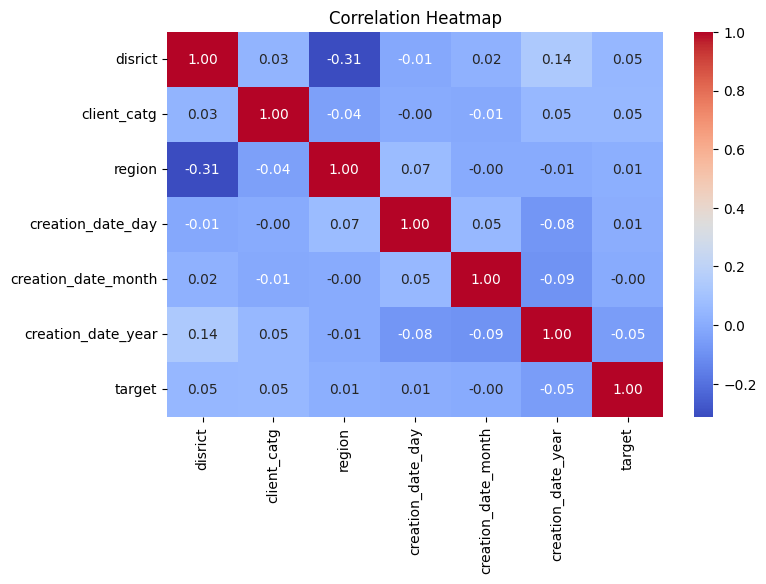

In [15]:
numerical_columns = client_train.select_dtypes(include=['int64', 'float64','int32'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 5))

# Create a heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")

plt.title('Correlation Heatmap')
plt.show()

* We can see that there is not much correlation with the target
* So we should move on to the invoice data

# EDA on Invoice data:

In [16]:
invoice_train

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476744,train_Client_99998,2005-08-19,10,1253571,0,202,9,1,400,135,0,0,3197,3732,8,ELEC
4476745,train_Client_99998,2005-12-19,10,1253571,0,202,6,1,200,6,0,0,3732,3938,4,ELEC
4476746,train_Client_99999,1996-09-25,11,560948,0,203,6,1,259,0,0,0,13884,14143,4,ELEC
4476747,train_Client_99999,1996-05-28,11,560948,0,203,6,1,603,0,0,0,13281,13884,4,ELEC


In [17]:
invoice_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476749 entries, 0 to 4476748
Data columns (total 16 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   client_id             object
 1   invoice_date          object
 2   tarif_type            int64 
 3   counter_number        int64 
 4   counter_statue        object
 5   counter_code          int64 
 6   reading_remarque      int64 
 7   counter_coefficient   int64 
 8   consommation_level_1  int64 
 9   consommation_level_2  int64 
 10  consommation_level_3  int64 
 11  consommation_level_4  int64 
 12  old_index             int64 
 13  new_index             int64 
 14  months_number         int64 
 15  counter_type          object
dtypes: int64(12), object(4)
memory usage: 546.5+ MB


* We have a lot of work to do with the invoice data:

* Lets start by the date of invoice:

In [18]:
# change type to datetime
invoice_train['invoice_date'] = pd.to_datetime(invoice_train['invoice_date'])

# Extract date features (day, month, year) i think the year gonna be the only usefull thing maybe month too
invoice_train['invoice_date_day'] = invoice_train['invoice_date'].dt.day
invoice_train['invoice_date_month'] = invoice_train['invoice_date'].dt.month
invoice_train['invoice_date_year'] = invoice_train['invoice_date'].dt.year

# Drop creation_date column
invoice_train.drop(columns=['invoice_date'], inplace=True)


# Same thing for test

# change type to datetime
invoice_test['invoice_date'] = pd.to_datetime(invoice_test['invoice_date'])

# Extract date features (day, month, year) i think the year gonna be the only usefull thing maybe month too
invoice_test['invoice_date_day'] = invoice_test['invoice_date'].dt.day
invoice_test['invoice_date_month'] = invoice_test['invoice_date'].dt.month
invoice_test['invoice_date_year'] = invoice_test['invoice_date'].dt.year

# Drop creation_date column
invoice_test.drop(columns=['invoice_date'], inplace=True)

* Now with the counter_statue column

In [19]:
invoice_train['counter_statue'].value_counts()

counter_statue
0         4379008
1           74036
5           20639
4            2729
3             258
2              32
46             14
A              13
618            12
769             6
269375          1
420             1
Name: count, dtype: int64

In [20]:
# Define a mapping dictionary
mapping = {
    '0': 0,
    '1': 1,
    '5': 5,
    '4': 4,
    '3': 3,
    '2': 2,
    '46': 46,
    'A': 13,
    '618': 618,
    '769': 769,
    '269375': 269375,
    '420': 420
}

# Apply the mapping to the 'counter_statue' column
invoice_train['counter_statue'] = invoice_train['counter_statue'].map(mapping)

# No neet for test since they have only numerical and with same mapping

* Now for the counter_type column:

In [21]:
invoice_train['counter_type'].value_counts()

counter_type
ELEC    3079406
GAZ     1397343
Name: count, dtype: int64

In [22]:
# ELEC = 1  | GAZ = 0
invoice_train['counter_type'] = (invoice_train['counter_type'] == 'ELEC').astype(int)


# Same for test

# ELEC = 1  | GAZ = 0
invoice_test['counter_type'] = (invoice_test['counter_type'] == 'ELEC').astype(int)

* Create new feature index_diff:

In [23]:
invoice_train['diff_index']=invoice_train['new_index']-invoice_train['old_index']

# Same for test
invoice_test['diff_index']=invoice_test['new_index']-invoice_test['old_index']

# Check for nan:

In [24]:
print('client_train:')
print(client_train.isna().sum())

print('client_test:')
print(client_test.isna().sum())

print('invoice_train:')
print(invoice_train.isna().sum())

print('invoice_test:')
print(invoice_test.isna().sum())


client_train:
disrict                0
client_id              0
client_catg            0
region                 0
creation_date_day      0
creation_date_month    0
creation_date_year     0
target                 0
dtype: int64
client_test:
disrict                0
client_id              0
client_catg            0
region                 0
creation_date_day      0
creation_date_month    0
creation_date_year     0
dtype: int64
invoice_train:
client_id               0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
invoice_date_day        0
invoice_date_month      0
invoice_date_year       0
diff_index              0
dtype: int64
invoice_test:
client_id               0
tarif_type

* We can see we have no NAN in all of our dataframes

# Correlation of the invoice data with target:

In [25]:
def MergeCorr(df1):
    # first we merge our data with the target
    merged_df = pd.merge(df1, client_train, on='client_id', how='left')

    numerical_columns = merged_df.drop(columns=['client_id'])

    # Calculate the correlation matrix
    correlation_matrix = numerical_columns.corr()

    # Set up the matplotlib figure
    plt.figure(figsize=(16, 16))

    # Create a heatmap with the correlation matrix
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")

    plt.title('Correlation Heatmap')
    plt.show()

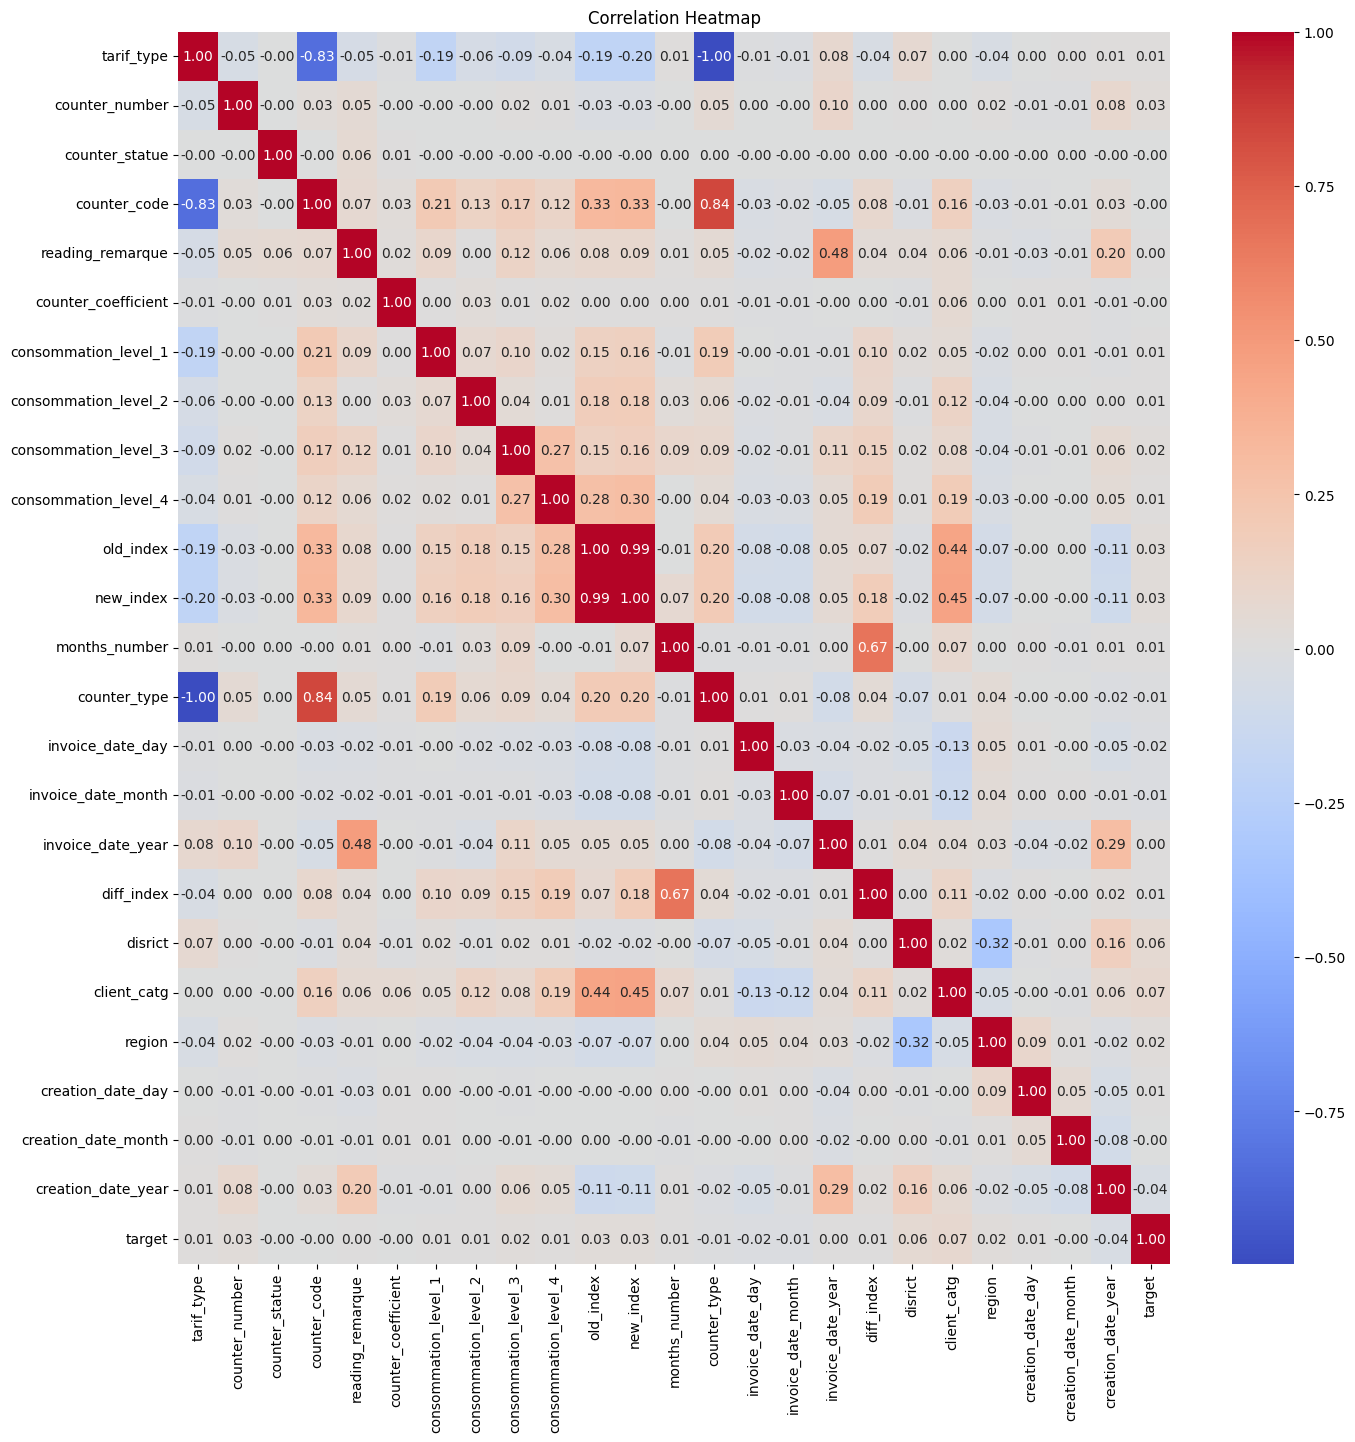

In [26]:
MergeCorr(invoice_train)

* We can see that the correlation with the target still very weak.

# Aggregation engineering:
* Because we have multiple invoices for each client
* And our problem is client based detection
* we need to find a way to aggregate invoices data in one row for the client

## Concat the invoice_train, invoice_test (for same pipeline):

In [27]:
print(f'{client_train.shape} | {client_test.shape}')
print(client_train.shape[0]+client_test.shape[0])

(135493, 8) | (58069, 7)
193562


In [28]:
print(f'{invoice_train.shape} | {invoice_test.shape}')

invoice = pd.concat([invoice_train, invoice_test], ignore_index=True)
print(invoice.shape)

(4476749, 19) | (1939730, 19)
(6416479, 19)


* We drop new and old index columns since there is no good way to aggreagte them and we already have the diff index.
* We drop the date of invoice its not helpfull at all and no way to aggregate them ( we have the months number should be usuefull).

In [29]:
invoice = invoice.drop(columns=['old_index','new_index','invoice_date_day','invoice_date_month','invoice_date_year'])

In [30]:
invoice

,client_id,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,months_number,counter_type,diff_index
0,train_Client_0,11,1335667,0,203,8,1,82,0,0,0,4,1,82
1,train_Client_0,11,1335667,0,203,6,1,1200,184,0,0,4,1,1384
2,train_Client_0,11,1335667,0,203,8,1,123,0,0,0,4,1,123
3,train_Client_0,11,1335667,0,207,8,1,102,0,0,0,4,1,102
4,train_Client_0,11,1335667,0,207,9,1,572,0,0,0,12,1,572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6416474,test_Client_9999,11,869269,0,203,6,1,248,0,0,0,4,1,248
6416475,test_Client_9999,11,869269,0,203,6,1,260,0,0,0,4,1,260
6416476,test_Client_9999,11,869269,0,203,6,1,312,0,0,0,4,1,312
6416477,test_Client_9999,11,869269,0,203,6,1,236,0,0,0,4,1,236


* We make mean, median, standard deviation for the numerical columns (consomation levels, months number, diff index):

In [31]:
import pandas as pd
import numpy as np

def AggMeanMedianStd(df):
    df = df.copy()
    # Group by 'client_id' and calculate the mean, median, and standard deviation for each specified column
    aggregated_df = df.groupby('client_id').agg({
        'consommation_level_1': ['mean', 'median', 'std'],
        'consommation_level_2': ['mean', 'median', 'std'],
        'consommation_level_3': ['mean', 'median', 'std'],
        'consommation_level_4': ['mean', 'median', 'std'],
        'months_number': ['mean', 'median', 'std'],
        'diff_index': ['mean', 'median', 'std']
    }).reset_index()

    # Flatten the multi-level column index
    aggregated_df.columns = ['_'.join(col).strip() for col in aggregated_df.columns.values]

    # Rename the columns for clarity
    aggregated_df.rename(columns={
        'client_id_': 'client_id',
        'consommation_level_1_mean': 'avg_consommation_level_1',
        'consommation_level_2_mean': 'avg_consommation_level_2',
        'consommation_level_3_mean': 'avg_consommation_level_3',
        'consommation_level_4_mean': 'avg_consommation_level_4',
        'months_number_mean': 'avg_months_number',
        'diff_index_mean': 'avg_diff_index',
        'consommation_level_1_median': 'median_consommation_level_1',
        'consommation_level_2_median': 'median_consommation_level_2',
        'consommation_level_3_median': 'median_consommation_level_3',
        'consommation_level_4_median': 'median_consommation_level_4',
        'months_number_median': 'median_months_number',
        'diff_index_median': 'median_diff_index',
    }, inplace=True)

    # Replace NaN in std columns with 0 (because clients with just one invoice got nan on std columns)
    std_columns = [col for col in aggregated_df.columns if col.endswith('_std')]
    aggregated_df[std_columns] = aggregated_df[std_columns].fillna(0)

    return aggregated_df


In [32]:
AggMeanMedianStd(invoice[['client_id','consommation_level_1','consommation_level_2','consommation_level_3','consommation_level_4','months_number','diff_index']])

,client_id,avg_consommation_level_1,median_consommation_level_1,consommation_level_1_std,avg_consommation_level_2,median_consommation_level_2,consommation_level_2_std,avg_consommation_level_3,median_consommation_level_3,consommation_level_3_std,avg_consommation_level_4,median_consommation_level_4,consommation_level_4_std,avg_months_number,median_months_number,months_number_std,avg_diff_index,median_diff_index,diff_index_std
0,test_Client_0,488.135135,415.0,230.388942,3.243243,0.0,19.727878,0.000000,0.0,0.000000,0.000000,0.0,0.000000,4.378378,4.0,1.319751,491.378378,415.0,235.684859
1,test_Client_1,1091.409091,800.0,739.185437,843.136364,400.0,986.933891,182.318182,0.0,316.613838,586.318182,0.0,2750.076040,4.545455,4.0,2.404901,2703.181818,1644.5,3200.849986
2,test_Client_10,554.040541,690.0,346.775891,37.364865,0.0,95.536205,15.743243,0.0,101.690110,0.162162,0.0,1.394972,4.000000,4.0,0.000000,607.310811,690.0,422.779872
3,test_Client_100,244.350000,139.0,247.253171,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,3.900000,4.0,0.441443,244.350000,139.0,247.253171
4,test_Client_1000,568.188679,460.0,486.891871,145.056604,0.0,348.808599,33.679245,0.0,187.919149,0.000000,0.0,0.000000,4.528302,4.0,1.716479,749.113208,460.0,864.294814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193557,train_Client_99995,1.957746,0.0,16.496265,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,4.225352,4.0,1.098014,0.000000,0.0,0.000000
193558,train_Client_99996,185.853659,121.0,200.935258,0.756098,0.0,4.841387,0.000000,0.0,0.000000,0.000000,0.0,0.000000,3.902439,4.0,0.436170,186.609756,121.0,203.347840
193559,train_Client_99997,273.083333,332.0,211.123441,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,4.111111,4.0,0.666667,273.083333,332.0,211.123441
193560,train_Client_99998,300.000000,300.0,141.421356,70.500000,70.5,91.216775,0.000000,0.0,0.000000,0.000000,0.0,0.000000,6.000000,6.0,2.828427,370.500000,370.5,232.638131


* Now for counter code, counter number, and counter type do the same thing make the count of unique values when aggregate.

In [33]:
def AggregateUniqueValues(df, group_column, columns_to_count):
    '''
    you can use this 
    AggregateUniqueValues(invoice_train, 'client_id', ['counter_code', 'counter_number', 'counter_type'])
    '''
    # Group by 'group_column' and calculate the number of unique values for specified columns
    unique_values = df.groupby(group_column)[columns_to_count].nunique()
    
    # Reset the index to make the result a DataFrame
    unique_values_df = unique_values.reset_index()
    
    # Rename the columns for clarity
    unique_values_df.columns = [group_column] + [f'{col}_unique' for col in columns_to_count]
    
    return unique_values_df

In [34]:
AggregateUniqueValues(invoice, 'client_id', ['counter_code', 'counter_number', 'counter_type'])

,client_id,counter_code_unique,counter_number_unique,counter_type_unique
0,test_Client_0,1,1,1
1,test_Client_1,1,1,1
2,test_Client_10,2,2,2
3,test_Client_100,2,2,2
4,test_Client_1000,2,3,2
...,...,...,...,...
193557,train_Client_99995,2,3,2
193558,train_Client_99996,2,3,2
193559,train_Client_99997,2,2,2
193560,train_Client_99998,1,1,1


* Now for reading_remarque, counter_statue, tarif_type, counter_coefficient we make one hot encoding of 0 and 1 then we make the sum when we aggregate.

In [35]:
def OneHotEncodeAndAggregate(df, columns_to_encode):
    '''aggregated_df = OneHotEncodeAndAggregate(df, ['column1', 'column2', 'column3'])'''
    # Perform one-hot encoding for specified columns
    df_encoded = pd.get_dummies(df, columns=columns_to_encode, prefix=columns_to_encode)

    # Group by 'client_id' and sum the one-hot encoding columns
    aggregated_df = df_encoded.groupby('client_id').sum().reset_index()

    return aggregated_df


In [36]:
OneHotEncodeAndAggregate(invoice[['client_id','reading_remarque','counter_statue','tarif_type','counter_coefficient']], ['reading_remarque','counter_statue','tarif_type','counter_coefficient'])

,client_id,reading_remarque_5,reading_remarque_6,reading_remarque_7,reading_remarque_8,reading_remarque_9,reading_remarque_203,reading_remarque_207,reading_remarque_413,counter_statue_0,...,counter_coefficient_8,counter_coefficient_9,counter_coefficient_10,counter_coefficient_11,counter_coefficient_20,counter_coefficient_21,counter_coefficient_30,counter_coefficient_33,counter_coefficient_40,counter_coefficient_50
0,test_Client_0,0,25,0,6,6,0,0,0,37,...,0,0,0,0,0,0,0,0,0,0
1,test_Client_1,0,7,0,9,6,0,0,0,21,...,0,0,0,0,0,0,0,0,0,0
2,test_Client_10,0,37,0,3,34,0,0,0,74,...,0,0,0,0,0,0,0,0,0,0
3,test_Client_100,0,30,0,7,3,0,0,0,40,...,0,0,0,0,0,0,0,0,0,0
4,test_Client_1000,0,16,0,10,27,0,0,0,52,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193557,train_Client_99995,0,71,0,0,0,0,0,0,70,...,0,0,0,0,0,0,0,0,0,0
193558,train_Client_99996,0,7,0,0,34,0,0,0,34,...,0,0,0,0,0,0,0,0,0,0
193559,train_Client_99997,0,0,0,0,36,0,0,0,36,...,0,0,0,0,0,0,0,0,0,0
193560,train_Client_99998,0,1,0,0,1,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0


* Now we merge all 3 dataframes from the Aggregate functions :

In [37]:
# Merge df1 and df2 on 'client_id'
df1=AggMeanMedianStd(invoice[['client_id','consommation_level_1','consommation_level_2','consommation_level_3','consommation_level_4','months_number','diff_index']])
df2=AggregateUniqueValues(invoice, 'client_id', ['counter_code', 'counter_number', 'counter_type'])
merged_df = pd.merge(df1, df2, on='client_id', how='inner')

# Merge merged_df and df3 on 'client_id'
df3=OneHotEncodeAndAggregate(invoice[['client_id','reading_remarque','counter_statue','tarif_type','counter_coefficient']], ['reading_remarque','counter_statue','tarif_type','counter_coefficient'])
final_merged_df = pd.merge(merged_df, df3, on='client_id', how='inner')

In [38]:
final_merged_df.shape

(193562, 76)

In [39]:
final_merged_df.columns

Index(['client_id', 'avg_consommation_level_1', 'median_consommation_level_1',
       'consommation_level_1_std', 'avg_consommation_level_2',
       'median_consommation_level_2', 'consommation_level_2_std',
       'avg_consommation_level_3', 'median_consommation_level_3',
       'consommation_level_3_std', 'avg_consommation_level_4',
       'median_consommation_level_4', 'consommation_level_4_std',
       'avg_months_number', 'median_months_number', 'months_number_std',
       'avg_diff_index', 'median_diff_index', 'diff_index_std',
       'counter_code_unique', 'counter_number_unique', 'counter_type_unique',
       'reading_remarque_5', 'reading_remarque_6', 'reading_remarque_7',
       'reading_remarque_8', 'reading_remarque_9', 'reading_remarque_203',
       'reading_remarque_207', 'reading_remarque_413', 'counter_statue_0',
       'counter_statue_1', 'counter_statue_2', 'counter_statue_3',
       'counter_statue_4', 'counter_statue_5', 'counter_statue_13',
       'counter_statue_4

In [40]:
final_merged_df

,client_id,avg_consommation_level_1,median_consommation_level_1,consommation_level_1_std,avg_consommation_level_2,median_consommation_level_2,consommation_level_2_std,avg_consommation_level_3,median_consommation_level_3,consommation_level_3_std,...,counter_coefficient_8,counter_coefficient_9,counter_coefficient_10,counter_coefficient_11,counter_coefficient_20,counter_coefficient_21,counter_coefficient_30,counter_coefficient_33,counter_coefficient_40,counter_coefficient_50
0,test_Client_0,488.135135,415.0,230.388942,3.243243,0.0,19.727878,0.000000,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,test_Client_1,1091.409091,800.0,739.185437,843.136364,400.0,986.933891,182.318182,0.0,316.613838,...,0,0,0,0,0,0,0,0,0,0
2,test_Client_10,554.040541,690.0,346.775891,37.364865,0.0,95.536205,15.743243,0.0,101.690110,...,0,0,0,0,0,0,0,0,0,0
3,test_Client_100,244.350000,139.0,247.253171,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,test_Client_1000,568.188679,460.0,486.891871,145.056604,0.0,348.808599,33.679245,0.0,187.919149,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193557,train_Client_99995,1.957746,0.0,16.496265,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
193558,train_Client_99996,185.853659,121.0,200.935258,0.756098,0.0,4.841387,0.000000,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
193559,train_Client_99997,273.083333,332.0,211.123441,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
193560,train_Client_99998,300.000000,300.0,141.421356,70.500000,70.5,91.216775,0.000000,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0


* Now we merge with the client dataframe:

In [41]:
client = pd.concat([client_train, client_test], ignore_index=True)
client.shape

(193562, 8)

In [42]:
final_merged_df = pd.merge(final_merged_df, client, on='client_id', how='inner')

In [43]:
final_merged_df.shape

(193562, 83)

In [44]:
final_merged_df.columns

Index(['client_id', 'avg_consommation_level_1', 'median_consommation_level_1',
       'consommation_level_1_std', 'avg_consommation_level_2',
       'median_consommation_level_2', 'consommation_level_2_std',
       'avg_consommation_level_3', 'median_consommation_level_3',
       'consommation_level_3_std', 'avg_consommation_level_4',
       'median_consommation_level_4', 'consommation_level_4_std',
       'avg_months_number', 'median_months_number', 'months_number_std',
       'avg_diff_index', 'median_diff_index', 'diff_index_std',
       'counter_code_unique', 'counter_number_unique', 'counter_type_unique',
       'reading_remarque_5', 'reading_remarque_6', 'reading_remarque_7',
       'reading_remarque_8', 'reading_remarque_9', 'reading_remarque_203',
       'reading_remarque_207', 'reading_remarque_413', 'counter_statue_0',
       'counter_statue_1', 'counter_statue_2', 'counter_statue_3',
       'counter_statue_4', 'counter_statue_5', 'counter_statue_13',
       'counter_statue_4

In [45]:
X_test = final_merged_df[final_merged_df['target'].isnull()].drop(columns='target')

In [46]:
train = final_merged_df[~final_merged_df['client_id'].isin(X_test['client_id'])]

# Check corr again:

* showing some of the top features:

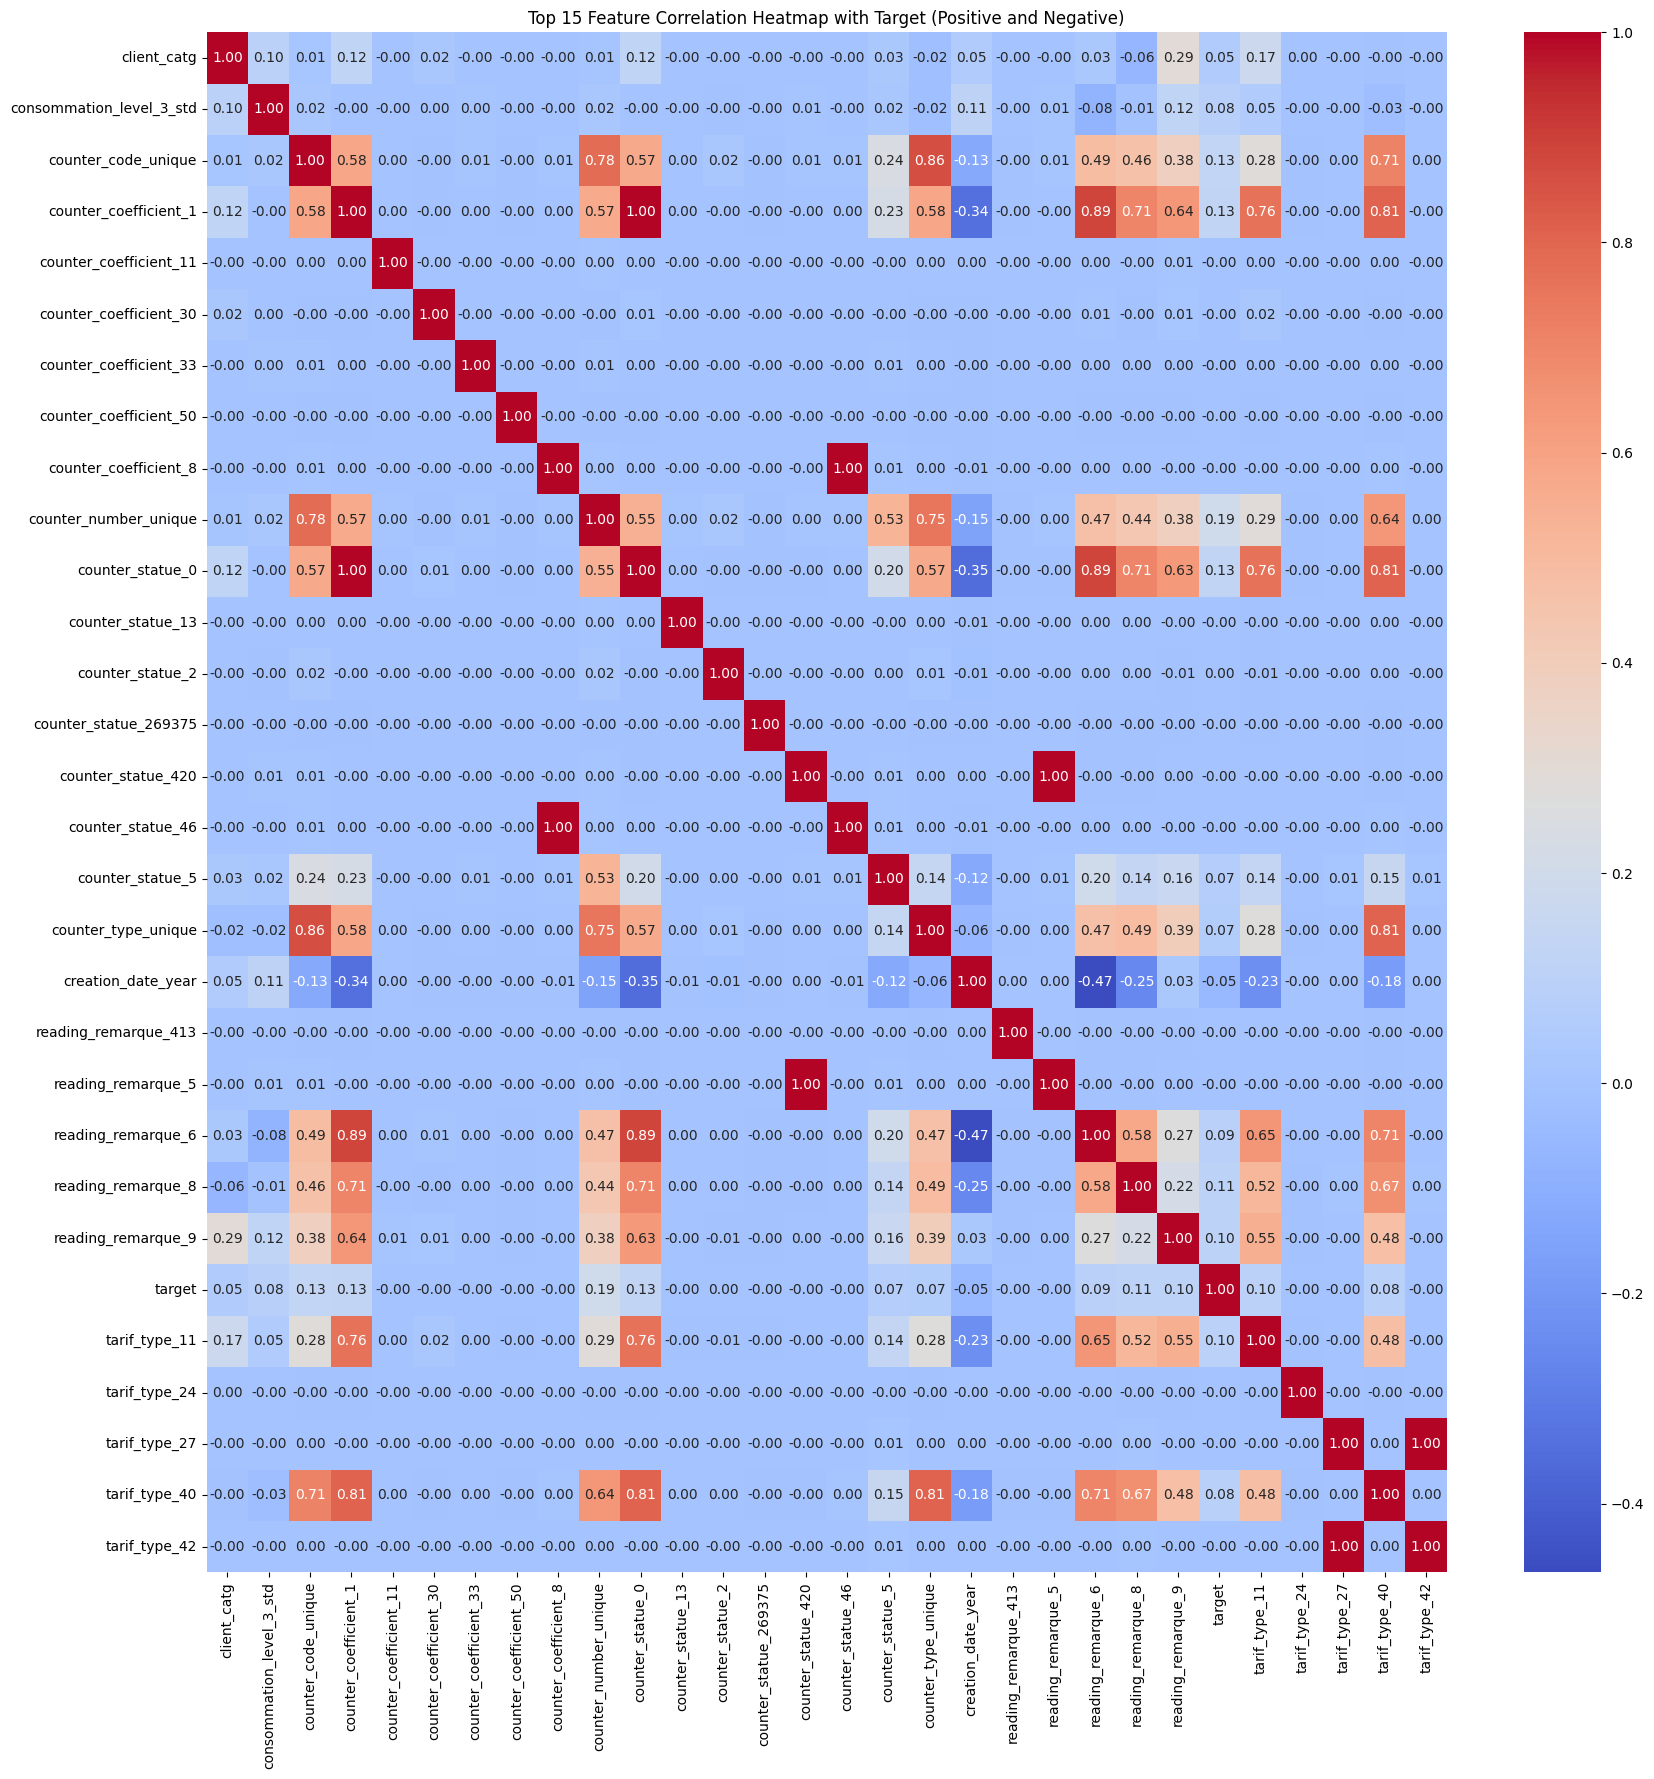

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'train' is your DataFrame
numerical_columns = train.select_dtypes(include=['number'])  # Select numerical columns
correlation_matrix = numerical_columns.corr()

# Get the top 15 features with the highest positive and negative correlations with 'target'
top_positive_features = correlation_matrix['target'].abs().sort_values(ascending=False).head(15).index
top_negative_features = correlation_matrix['target'].abs().sort_values(ascending=True).head(15).index

# Combine the selected features
top_features = top_positive_features.union(top_negative_features)

# Create a heatmap with the selected features
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix.loc[top_features, top_features], annot=True, fmt=".2f", cmap="coolwarm")

plt.title('Top 15 Feature Correlation Heatmap with Target (Positive and Negative)')
plt.show()


# Filter features with less than threshold:

In [48]:
# def FilterFeatures(df,correlation_threshold):
#     '''FilterFeatures(train,0.01)'''
    
#     df = df.copy().drop(columns=['client_id'])
    
#     # Calculate the correlation between 'target' and all other columns
#     correlations = df.corrwith(df['target'])

#     # Get the columns with correlation greater than or equal to the threshold
#     selected_columns = correlations[abs(correlations) >= correlation_threshold].index

#     # Create a new DataFrame with the selected columns
#     df_filtered = df[selected_columns]
    
#     # show corr matrix
#     correlation_matrix = df_filtered.corr()
    
#     plt.figure(figsize=(30, 30))
#     sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
    
#     return selected_columns

# selected_columns = FilterFeatures(train,0.01)
# train = train[selected_columns.append(pd.Index(['client_id']))]


# # test_selected_columns=list(selected_columns)
# # test_selected_columns.remove('target')
# X_test = X_test[selected_columns.difference(pd.Index(['target'])).append(pd.Index(['client_id']))]

# display(train)
# display(X_test)

# Split X,y

In [49]:
from sklearn.model_selection import train_test_split

# Assuming 'train' is your DataFrame
X = train.drop(['target','client_id'], axis=1)
y = train['target']

# Split the data into training and validation sets (85% training, 15% validation)
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

In [50]:
print(f'X_train : {X_train.shape}')
print(f'X_val : {X_val.shape}')
print(f'y_train : {y_train.shape}')
print(f'y_val : {y_val.shape}')

X_train : (121943, 81)
X_val : (13550, 81)
y_train : (121943,)
y_val : (13550,)


# Trying XGBoost model:

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score

def FullMetrics(y_val,model):
    '''
    FullMetrics(y_val,model)
    '''
    
    # Make predictions on the validation data
    y_pred = model.predict(X_val)

    # Calculate classification metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    # Create a classification report
    classification_rep = classification_report(y_val, y_pred)

    # Create a confusion matrix
    confusion = confusion_matrix(y_val, y_pred)

    # Print the metrics
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')

    # Print the full classification report
    print(classification_rep)

    # Print the confusion matrix
    print("Confusion Matrix:")
    print(confusion)
    # Get predicted probabilities for the positive class (class 1)
    y_val_pred_prob = model.predict_proba(X_val)[:, 1]

    # Calculate the AUC
    auc = roc_auc_score(y_val, y_val_pred_prob)
    print(f'AUC on the validation set: {auc}')
    # auc the more the better


In [52]:
#First try and Number 2 score 0.859210126  auc 0.8363748228553298
import xgboost as xgb
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=50000,
    learning_rate=0.01,  # Reduced learning rate
    max_depth=3,
    early_stopping_rounds=100,  # Apply early stopping
    objective='binary:logistic',
    random_state=42,
    scale_pos_weight=sum(y_train == 0) / sum(y_train == 1),
    gamma=0.1,  # Adjust gamma for regularization
    reg_lambda=1,  # Adjust reg_lambda for L2 regularization
    reg_alpha=0,  # Adjust reg_alpha for L1 regularization
)

model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    verbose=500
)

[0]	validation_0-logloss:0.69060	validation_1-logloss:0.69057
[500]	validation_0-logloss:0.49478	validation_1-logloss:0.49260
[1000]	validation_0-logloss:0.46637	validation_1-logloss:0.46563
[1500]	validation_0-logloss:0.45357	validation_1-logloss:0.45452
[2000]	validation_0-logloss:0.44457	validation_1-logloss:0.44713
[2500]	validation_0-logloss:0.43731	validation_1-logloss:0.44144
[3000]	validation_0-logloss:0.43169	validation_1-logloss:0.43705
[3500]	validation_0-logloss:0.42634	validation_1-logloss:0.43279
[4000]	validation_0-logloss:0.42158	validation_1-logloss:0.42924
[4500]	validation_0-logloss:0.41703	validation_1-logloss:0.42597
[5000]	validation_0-logloss:0.41267	validation_1-logloss:0.42283
[5500]	validation_0-logloss:0.40873	validation_1-logloss:0.42004
[6000]	validation_0-logloss:0.40494	validation_1-logloss:0.41742
[6500]	validation_0-logloss:0.40111	validation_1-logloss:0.41476
[7000]	validation_0-logloss:0.39744	validation_1-logloss:0.41227
[7500]	validation_0-logloss:0

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=100,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [53]:
FullMetrics(y_val,model)

Accuracy: 0.88
Precision: 0.26
Recall: 0.61
F1 Score: 0.36
              precision    recall  f1-score   support

         0.0       0.97      0.90      0.93     19189
         1.0       0.26      0.61      0.36      1135

    accuracy                           0.88     20324
   macro avg       0.62      0.75      0.65     20324
weighted avg       0.93      0.88      0.90     20324

Confusion Matrix:
[[17193  1996]
 [  447   688]]
AUC on the validation set: 0.8363748228553298


In [57]:

import xgboost as xgb
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=150000,
    learning_rate=0.01,  # Reduced learning rate
    max_depth=3,
    early_stopping_rounds=100,  # Apply early stopping
    objective='binary:logistic',
    random_state=42,
    scale_pos_weight=sum(y_train == 0) / sum(y_train == 1),
    gamma=0.1,  # Adjust gamma for regularization
    reg_lambda=1,  # Adjust reg_lambda for L2 regularization
    reg_alpha=0,  # Adjust reg_alpha for L1 regularization
)

model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    verbose=500
)

[0]	validation_0-logloss:0.69060	validation_1-logloss:0.69057
[500]	validation_0-logloss:0.49478	validation_1-logloss:0.49260
[1000]	validation_0-logloss:0.46637	validation_1-logloss:0.46563
[1500]	validation_0-logloss:0.45357	validation_1-logloss:0.45452
[2000]	validation_0-logloss:0.44457	validation_1-logloss:0.44713
[2500]	validation_0-logloss:0.43731	validation_1-logloss:0.44144
[3000]	validation_0-logloss:0.43169	validation_1-logloss:0.43705
[3500]	validation_0-logloss:0.42634	validation_1-logloss:0.43279
[4000]	validation_0-logloss:0.42158	validation_1-logloss:0.42924
[4500]	validation_0-logloss:0.41703	validation_1-logloss:0.42597
[5000]	validation_0-logloss:0.41267	validation_1-logloss:0.42283
[5500]	validation_0-logloss:0.40873	validation_1-logloss:0.42004
[6000]	validation_0-logloss:0.40494	validation_1-logloss:0.41742
[6500]	validation_0-logloss:0.40111	validation_1-logloss:0.41476
[7000]	validation_0-logloss:0.39744	validation_1-logloss:0.41227
[7500]	validation_0-logloss:0

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=100,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [58]:
FullMetrics(y_val,model) # 150k

Accuracy: 0.91
Precision: 0.31
Recall: 0.43
F1 Score: 0.36
              precision    recall  f1-score   support

         0.0       0.97      0.94      0.95     19189
         1.0       0.31      0.43      0.36      1135

    accuracy                           0.91     20324
   macro avg       0.64      0.69      0.66     20324
weighted avg       0.93      0.91      0.92     20324

Confusion Matrix:
[[18066  1123]
 [  642   493]]
AUC on the validation set: 0.8125870112350987


In [135]:
# Predictions 3 with feature filtering score 0.828338256 AUC 0.8300412796152714 
import xgboost as xgb
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=50000,
    learning_rate=0.01,  # Reduced learning rate
    max_depth=3,
    early_stopping_rounds=100,  # Apply early stopping
    objective='binary:logistic',
    random_state=42,
    scale_pos_weight=sum(y_train == 0) / sum(y_train == 1),
    gamma=0.1,  # Adjust gamma for regularization
    reg_lambda=1,  # Adjust reg_lambda for L2 regularization
    reg_alpha=0,  # Adjust reg_alpha for L1 regularization
)

model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    verbose=500
)

[0]	validation_0-logloss:0.69060	validation_1-logloss:0.69057
[500]	validation_0-logloss:0.49369	validation_1-logloss:0.49169
[1000]	validation_0-logloss:0.46882	validation_1-logloss:0.46819
[1500]	validation_0-logloss:0.45695	validation_1-logloss:0.45765
[2000]	validation_0-logloss:0.44937	validation_1-logloss:0.45134
[2500]	validation_0-logloss:0.44326	validation_1-logloss:0.44675
[3000]	validation_0-logloss:0.43808	validation_1-logloss:0.44273
[3500]	validation_0-logloss:0.43355	validation_1-logloss:0.43943
[4000]	validation_0-logloss:0.42920	validation_1-logloss:0.43635
[4500]	validation_0-logloss:0.42517	validation_1-logloss:0.43348
[5000]	validation_0-logloss:0.42108	validation_1-logloss:0.43056
[5500]	validation_0-logloss:0.41738	validation_1-logloss:0.42799
[6000]	validation_0-logloss:0.41386	validation_1-logloss:0.42568
[6500]	validation_0-logloss:0.41058	validation_1-logloss:0.42345
[7000]	validation_0-logloss:0.40722	validation_1-logloss:0.42119
[7500]	validation_0-logloss:0

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=100,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [136]:
FullMetrics(y_val,model)

Accuracy: 0.87
Precision: 0.24
Recall: 0.62
F1 Score: 0.35
              precision    recall  f1-score   support

         0.0       0.98      0.88      0.93     19189
         1.0       0.24      0.62      0.35      1135

    accuracy                           0.87     20324
   macro avg       0.61      0.75      0.64     20324
weighted avg       0.93      0.87      0.89     20324

Confusion Matrix:
[[16944  2245]
 [  430   705]]
AUC on the validation set: 0.8300412796152714


In [69]:
# Prediction4 AUC as eval metric with filtered features
import xgboost as xgb
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=50000,
    learning_rate=0.01,  # Reduced learning rate
    max_depth=3,
    early_stopping_rounds=100,  # Apply early stopping
    objective='binary:logistic',
    random_state=42,
    scale_pos_weight=sum(y_train == 0) / sum(y_train == 1),
    gamma=0.1,  # Adjust gamma for regularization
    reg_lambda=1,  # Adjust reg_lambda for L2 regularization
    reg_alpha=0,  # Adjust reg_alpha for L1 regularization
)

model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    eval_metric=['auc'],
    verbose=500
)

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.78173	validation_1-auc:0.78530
[500]	validation_0-auc:0.85292	validation_1-auc:0.85169
[1000]	validation_0-auc:0.86604	validation_1-auc:0.86195
[1500]	validation_0-auc:0.87230	validation_1-auc:0.86531
[2000]	validation_0-auc:0.87680	validation_1-auc:0.86644
[2301]	validation_0-auc:0.87910	validation_1-auc:0.86669


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=100,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [70]:
FullMetrics(y_val,model)

Accuracy: 0.80
Precision: 0.19
Recall: 0.78
F1 Score: 0.30
              precision    recall  f1-score   support

         0.0       0.98      0.80      0.88     19189
         1.0       0.19      0.78      0.30      1135

    accuracy                           0.80     20324
   macro avg       0.59      0.79      0.59     20324
weighted avg       0.94      0.80      0.85     20324

Confusion Matrix:
[[15349  3840]
 [  249   886]]
AUC on the validation set: 0.8667056865132213


In [122]:
# Prediction5 AUC as eval metric with all features
import xgboost as xgb
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=50000,
    learning_rate=0.01,  # Reduced learning rate
    max_depth=3,
    early_stopping_rounds=100,  # Apply early stopping
    objective='binary:logistic',
    random_state=42,
    scale_pos_weight=sum(y_train == 0) / sum(y_train == 1),
    gamma=0.1,  # Adjust gamma for regularization
    reg_lambda=1,  # Adjust reg_lambda for L2 regularization
    reg_alpha=0,  # Adjust reg_alpha for L1 regularization
)

model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    eval_metric=['auc'],
    verbose=500
)

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.78173	validation_1-auc:0.78530
[500]	validation_0-auc:0.85330	validation_1-auc:0.85178
[1000]	validation_0-auc:0.86847	validation_1-auc:0.86456
[1500]	validation_0-auc:0.87566	validation_1-auc:0.86830
[2000]	validation_0-auc:0.88102	validation_1-auc:0.86982
[2445]	validation_0-auc:0.88502	validation_1-auc:0.87038


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=100,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [123]:
FullMetrics(y_val,model)

Accuracy: 0.80
Precision: 0.19
Recall: 0.78
F1 Score: 0.31
              precision    recall  f1-score   support

         0.0       0.98      0.80      0.88     19189
         1.0       0.19      0.78      0.31      1135

    accuracy                           0.80     20324
   macro avg       0.59      0.79      0.60     20324
weighted avg       0.94      0.80      0.85     20324

Confusion Matrix:
[[15412  3777]
 [  248   887]]
AUC on the validation set: 0.8704041159777892


In [ ]:
# try anomaly models

In [52]:
# Prediction 6 with lower learning rate
import xgboost as xgb
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=50000,
    learning_rate=0.006,  # Reduced learning rate
    max_depth=3,
    early_stopping_rounds=200,  # Apply early stopping
    objective='binary:logistic',
    random_state=42,
    scale_pos_weight=sum(y_train == 0) / sum(y_train == 1),
    gamma=0.1,  # Adjust gamma for regularization
    reg_lambda=1,  # Adjust reg_lambda for L2 regularization
    reg_alpha=0,  # Adjust reg_alpha for L1 regularization
)

model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    eval_metric=['auc'],
    verbose=100
)

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.78173	validation_1-auc:0.78530
[100]	validation_0-auc:0.81623	validation_1-auc:0.81921
[200]	validation_0-auc:0.82619	validation_1-auc:0.82878
[300]	validation_0-auc:0.83243	validation_1-auc:0.83374
[400]	validation_0-auc:0.83719	validation_1-auc:0.83790
[500]	validation_0-auc:0.84070	validation_1-auc:0.84115
[600]	validation_0-auc:0.84440	validation_1-auc:0.84411
[700]	validation_0-auc:0.84873	validation_1-auc:0.84786
[800]	validation_0-auc:0.85218	validation_1-auc:0.85086
[900]	validation_0-auc:0.85520	validation_1-auc:0.85344
[1000]	validation_0-auc:0.85752	validation_1-auc:0.85532
[1100]	validation_0-auc:0.85983	validation_1-auc:0.85741
[1200]	validation_0-auc:0.86189	validation_1-auc:0.85921
[1300]	validation_0-auc:0.86369	validation_1-auc:0.86084
[1400]	validation_0-auc:0.86521	validation_1-auc:0.86214
[1500]	validation_0-auc:0.86648	validation_1-auc:0.86315
[1600]	validation_0-auc:0.86765	validation_1-auc:0.86408
[1700]	validation_0-auc:0.86875	validation_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=200,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.006, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [60]:
# Prediction 7 with lower learning rate
import xgboost as xgb
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=100000,
    learning_rate=0.001,  # Reduced learning rate
    max_depth=3,
    early_stopping_rounds=500,  # Apply early stopping
    objective='binary:logistic',
    random_state=42,
    scale_pos_weight=sum(y_train == 0) / sum(y_train == 1),
    gamma=0.1,  # Adjust gamma for regularization
    reg_lambda=1,  # Adjust reg_lambda for L2 regularization
    reg_alpha=0,  # Adjust reg_alpha for L1 regularization
    eval_metric=['auc']
)

model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    verbose=500
)

[0]	validation_0-auc:0.78173	validation_1-auc:0.78530
[500]	validation_0-auc:0.81398	validation_1-auc:0.81731
[1000]	validation_0-auc:0.82297	validation_1-auc:0.82617
[1500]	validation_0-auc:0.82962	validation_1-auc:0.83172
[2000]	validation_0-auc:0.83393	validation_1-auc:0.83506
[2500]	validation_0-auc:0.83768	validation_1-auc:0.83850
[3000]	validation_0-auc:0.84064	validation_1-auc:0.84112
[3500]	validation_0-auc:0.84381	validation_1-auc:0.84360
[4000]	validation_0-auc:0.84720	validation_1-auc:0.84649
[4500]	validation_0-auc:0.85058	validation_1-auc:0.84946
[5000]	validation_0-auc:0.85342	validation_1-auc:0.85186
[5500]	validation_0-auc:0.85568	validation_1-auc:0.85379
[6000]	validation_0-auc:0.85746	validation_1-auc:0.85525
[6500]	validation_0-auc:0.85923	validation_1-auc:0.85680
[7000]	validation_0-auc:0.86112	validation_1-auc:0.85856
[7500]	validation_0-auc:0.86273	validation_1-auc:0.86004
[8000]	validation_0-auc:0.86411	validation_1-auc:0.86125
[8500]	validation_0-auc:0.86536	val

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=500,
              enable_categorical=False, eval_metric=['auc'], feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [100]:
# Prediction 6 with 95% split
import xgboost as xgb
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=50000,
    learning_rate=0.01,  # Reduced learning rate
    max_depth=3,
    early_stopping_rounds=200,  # Apply early stopping
    objective='binary:logistic',
    random_state=42,
    scale_pos_weight=sum(y_train == 0) / sum(y_train == 1),
    gamma=0.1,  # Adjust gamma for regularization
    reg_lambda=1,  # Adjust reg_lambda for L2 regularization
    reg_alpha=0,  # Adjust reg_alpha for L1 regularization
)

model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    eval_metric=['auc'],
    verbose=500
)

FullMetrics(y_val,model)

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.78264	validation_1-auc:0.77526
[500]	validation_0-auc:0.85394	validation_1-auc:0.84306
[1000]	validation_0-auc:0.86874	validation_1-auc:0.85684
[1500]	validation_0-auc:0.87562	validation_1-auc:0.86043
[2000]	validation_0-auc:0.88052	validation_1-auc:0.86240
[2500]	validation_0-auc:0.88463	validation_1-auc:0.86322
[2881]	validation_0-auc:0.88732	validation_1-auc:0.86329
Accuracy: 0.80
Precision: 0.18
Recall: 0.75
F1 Score: 0.29
              precision    recall  f1-score   support

         0.0       0.98      0.80      0.88      6397
         1.0       0.18      0.75      0.29       378

    accuracy                           0.80      6775
   macro avg       0.58      0.78      0.59      6775
weighted avg       0.94      0.80      0.85      6775

Confusion Matrix:
[[5128 1269]
 [  94  284]]
AUC on the validation set: 0.8633540192864876


In [54]:
# Prediction 6 with 90% split
import xgboost as xgb
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=50000,
    learning_rate=0.01,  # Reduced learning rate
    max_depth=3,
    early_stopping_rounds=200,  # Apply early stopping
    objective='binary:logistic',
    random_state=42,
    scale_pos_weight=sum(y_train == 0) / sum(y_train == 1),
    gamma=0.1,  # Adjust gamma for regularization
    reg_lambda=1,  # Adjust reg_lambda for L2 regularization
    reg_alpha=0,  # Adjust reg_alpha for L1 regularization
)

model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    eval_metric=['auc'],
    verbose=500
)

FullMetrics(y_val,model)

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.78152	validation_1-auc:0.78896
[500]	validation_0-auc:0.85346	validation_1-auc:0.85252
[1000]	validation_0-auc:0.86830	validation_1-auc:0.86504
[1500]	validation_0-auc:0.87529	validation_1-auc:0.86916
[2000]	validation_0-auc:0.88044	validation_1-auc:0.87157
[2500]	validation_0-auc:0.88472	validation_1-auc:0.87271
[3000]	validation_0-auc:0.88811	validation_1-auc:0.87328
[3461]	validation_0-auc:0.89113	validation_1-auc:0.87351
Accuracy: 0.81
Precision: 0.19
Recall: 0.78
F1 Score: 0.31
              precision    recall  f1-score   support

         0.0       0.98      0.81      0.89     12793
         1.0       0.19      0.78      0.31       757

    accuracy                           0.81     13550
   macro avg       0.59      0.79      0.60     13550
weighted avg       0.94      0.81      0.86     13550

Confusion Matrix:
[[10348  2445]
 [  168   589]]
AUC on the validation set: 0.873538214064185


In [76]:
#Prediction7 with 100% split 3500 epochs

import xgboost as xgb
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=3500,
    learning_rate=0.01,  # Reduced learning rate
    max_depth=3,
    objective='binary:logistic',
    random_state=42,
    scale_pos_weight=sum(y_train == 0) / sum(y_train == 1),
    gamma=0.1,  # Adjust gamma for regularization
    reg_lambda=1,  # Adjust reg_lambda for L2 regularization
    reg_alpha=0,  # Adjust reg_alpha for L1 regularization
)

model.fit(
    X, y,
    eval_set=[(X, y)],
    eval_metric=['auc'],
    verbose=500
)

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.78226
[500]	validation_0-auc:0.85317
[1000]	validation_0-auc:0.86802
[1500]	validation_0-auc:0.87483
[2000]	validation_0-auc:0.87947
[2500]	validation_0-auc:0.88358
[3000]	validation_0-auc:0.88686
[3499]	validation_0-auc:0.88984


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=3500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [78]:
#Prediction8 with 100% split 4500 epochs

import xgboost as xgb
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=4500,
    learning_rate=0.01,  # Reduced learning rate
    max_depth=3,
    objective='binary:logistic',
    random_state=42,
    scale_pos_weight=sum(y_train == 0) / sum(y_train == 1),
    gamma=0.1,  # Adjust gamma for regularization
    reg_lambda=1,  # Adjust reg_lambda for L2 regularization
    reg_alpha=0,  # Adjust reg_alpha for L1 regularization
)

model.fit(
    X, y,
    eval_set=[(X, y)],
    eval_metric=['auc'],
    verbose=500
)

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.78226
[500]	validation_0-auc:0.85317
[1000]	validation_0-auc:0.86802
[1500]	validation_0-auc:0.87483
[2000]	validation_0-auc:0.87947
[2500]	validation_0-auc:0.88358
[3000]	validation_0-auc:0.88686
[3500]	validation_0-auc:0.88985
[4000]	validation_0-auc:0.89265
[4499]	validation_0-auc:0.89513


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=4500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [80]:
#Prediction9 with 100% split 5500 epochs

import xgboost as xgb
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=5500,
    learning_rate=0.01,  # Reduced learning rate
    max_depth=3,
    objective='binary:logistic',
    random_state=42,
    scale_pos_weight=sum(y_train == 0) / sum(y_train == 1),
    gamma=0.1,  # Adjust gamma for regularization
    reg_lambda=1,  # Adjust reg_lambda for L2 regularization
    reg_alpha=0,  # Adjust reg_alpha for L1 regularization
)

model.fit(
    X, y,
    eval_set=[(X, y)],
    eval_metric=['auc'],
    verbose=500
)

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.78226
[500]	validation_0-auc:0.85317
[1000]	validation_0-auc:0.86802
[1500]	validation_0-auc:0.87483
[2000]	validation_0-auc:0.87947
[2500]	validation_0-auc:0.88358
[3000]	validation_0-auc:0.88686
[3500]	validation_0-auc:0.88985
[4000]	validation_0-auc:0.89265
[4500]	validation_0-auc:0.89513
[5000]	validation_0-auc:0.89752
[5499]	validation_0-auc:0.89967


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=5500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [52]:
#Prediction10 with 100% split 6500 epochs

import xgboost as xgb
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=6500,
    learning_rate=0.01,  # Reduced learning rate
    max_depth=3,
    objective='binary:logistic',
    random_state=42,
    scale_pos_weight=sum(y_train == 0) / sum(y_train == 1),
    gamma=0.1,  # Adjust gamma for regularization
    reg_lambda=1,  # Adjust reg_lambda for L2 regularization
    reg_alpha=0,  # Adjust reg_alpha for L1 regularization
)

model.fit(
    X, y,
    eval_set=[(X, y)],
    eval_metric=['auc'],
    verbose=500
)

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.78226
[500]	validation_0-auc:0.85317
[1000]	validation_0-auc:0.86802
[1500]	validation_0-auc:0.87483
[2000]	validation_0-auc:0.87947
[2500]	validation_0-auc:0.88358
[3000]	validation_0-auc:0.88686
[3500]	validation_0-auc:0.88985
[4000]	validation_0-auc:0.89265
[4500]	validation_0-auc:0.89513
[5000]	validation_0-auc:0.89752
[5500]	validation_0-auc:0.89967
[6000]	validation_0-auc:0.90176
[6499]	validation_0-auc:0.90373


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=6500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [54]:
#Prediction11 with 100% split 5000 epochs

import xgboost as xgb
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=5000,
    learning_rate=0.01,  # Reduced learning rate
    max_depth=3,
    objective='binary:logistic',
    random_state=42,
    scale_pos_weight=sum(y_train == 0) / sum(y_train == 1),
    gamma=0.1,  # Adjust gamma for regularization
    reg_lambda=1,  # Adjust reg_lambda for L2 regularization
    reg_alpha=0,  # Adjust reg_alpha for L1 regularization
)

model.fit(
    X, y,
    eval_set=[(X, y)],
    eval_metric=['auc'],
    verbose=500
)

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.78226
[500]	validation_0-auc:0.85317
[1000]	validation_0-auc:0.86802
[1500]	validation_0-auc:0.87483
[2000]	validation_0-auc:0.87947
[2500]	validation_0-auc:0.88358
[3000]	validation_0-auc:0.88686
[3500]	validation_0-auc:0.88985
[4000]	validation_0-auc:0.89265
[4500]	validation_0-auc:0.89513
[4999]	validation_0-auc:0.89752


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=5000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [56]:
#Prediction12 with 100% split 4000 epochs

import xgboost as xgb
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=4000,
    learning_rate=0.01,  # Reduced learning rate
    max_depth=3,
    objective='binary:logistic',
    random_state=42,
    scale_pos_weight=sum(y_train == 0) / sum(y_train == 1),
    gamma=0.1,  # Adjust gamma for regularization
    reg_lambda=1,  # Adjust reg_lambda for L2 regularization
    reg_alpha=0,  # Adjust reg_alpha for L1 regularization
)

model.fit(
    X, y,
    eval_set=[(X, y)],
    eval_metric=['auc'],
    verbose=500
)

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.78226
[500]	validation_0-auc:0.85317
[1000]	validation_0-auc:0.86802
[1500]	validation_0-auc:0.87483
[2000]	validation_0-auc:0.87947
[2500]	validation_0-auc:0.88358
[3000]	validation_0-auc:0.88686
[3500]	validation_0-auc:0.88985
[3999]	validation_0-auc:0.89264


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=4000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

# Make prediction and export submission:

In [57]:
# For xgboost model
# order=['consommation_level_1_std', 'consommation_level_2_std', 'avg_consommation_level_3', 'consommation_level_3_std', 'avg_consommation_level_4', 'consommation_level_4_std', 'diff_index_std', 'counter_code_unique', 'counter_number_unique', 'counter_type_unique', 'reading_remarque_6', 'reading_remarque_7', 'reading_remarque_8', 'reading_remarque_9', 'counter_statue_0', 'counter_statue_1', 'counter_statue_5', 'tarif_type_10', 'tarif_type_11', 'tarif_type_12', 'tarif_type_13', 'tarif_type_14', 'tarif_type_15', 'tarif_type_18', 'tarif_type_29', 'tarif_type_40', 'tarif_type_45', 'counter_coefficient_1', 'counter_coefficient_5', 'disrict', 'client_catg', 'region', 'creation_date_year']
# predictions=model.predict_proba(X_test.drop(columns=['client_id'])[order])[:,1]
predictions=model.predict_proba(X_test.drop(columns=['client_id']))[:,1]

# Make results dataframe
result_df = pd.DataFrame({'client_id': X_test['client_id'], 'predictions': predictions})

#Export csv file
result_df.to_csv('predictions12.csv', index=False)